## Observations and Insights 

Three observations or inferences:
1. Capomulin and Ramicane are about equally effective at shrinking tumor growth. The median tumor size at the end of the experiment was 36.56165229mm3 for mice treated with Capomulin and 38.1251644mm3 for mice treated with Ramicane. 
2. Two other treatments, Infubinol and Ceftamin, were much less effective at shrinking tumors, with median tumor sizes of 60.16518046mm3 and 59.85195552mm3, respectively, at the end of the experiment.
3. The outlier data point in the mice treated with Infubinol is from a mouse who was only measured at timepoints 0 and 5.

In [59]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")

# Display the data table for preview
mouse_study_df.head(10)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [2]:
# Checking the number of mice.
mouse_number = len(mouse_study_df["Mouse ID"].unique())
mouse_number

249

In [202]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

#all instances of duplicated data will be True in new Dupes column
mouse_study_df['Duplicate'] = mouse_study_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False) 

#return Mouse ID for any row that is true, store in variable dupe_mouse
dupe_mouse_series = mouse_study_df.loc[mouse_study_df["Duplicate"] == True, "Mouse ID"]
dupe_mouse = dupe_mouse_series.iloc[1]

In [203]:
# Optional: Get all the data for the duplicate mouse ID. 
dupe_data = mouse_study_df.loc[mouse_study_df['Mouse ID'] == dupe_mouse, :].copy()

In [204]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_study_nodupes_df = mouse_study_df.loc[mouse_study_df['Mouse ID'] != dupe_mouse, :].copy()

In [205]:
# Checking the number of mice in the clean DataFrame.
mouse2_number = len(mouse_study_nodupes_df["Mouse ID"].unique())
mouse2_number

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume 
#for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

regimen_summary_group = mouse_study_nodupes_df.groupby(["Drug Regimen"])

tumor_mean = regimen_summary_group["Tumor Volume (mm3)"].mean()
tumor_median = regimen_summary_group["Tumor Volume (mm3)"].median()
tumor_std = regimen_summary_group["Tumor Volume (mm3)"].std()
tumor_var = regimen_summary_group["Tumor Volume (mm3)"].var()
tumor_sem = regimen_summary_group["Tumor Volume (mm3)"].sem()

regimen_summary_longway = pd.DataFrame(
    {"Mean Tumor Volume (mm3)": tumor_mean,
     "Median Tumor Volume (mm3)": tumor_median, 
     "Standard Deviation": tumor_std, 
     "Variation": tumor_var, 
     "SEM": tumor_sem   
    }
)

regimen_summary_longway

,Mean Tumor Volume (mm3),Median Tumor Volume (mm3),Standard Deviation,Variation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,4.994774,24.947764,0.329346
Ceftamin,52.591172,51.776157,6.268188,39.290177,0.469821
Infubinol,52.884795,51.820584,6.567243,43.128684,0.492236
Ketapril,55.235638,53.698743,8.279709,68.553577,0.603860
Naftisol,54.331565,52.509285,8.134708,66.173479,0.596466
Placebo,54.033581,52.288934,7.821003,61.168083,0.581331
Propriva,52.320930,50.446266,6.622085,43.852013,0.544332
Ramicane,40.216745,40.673236,4.846308,23.486704,0.320955
Stelasyn,54.233149,52.431737,7.710419,59.450562,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume 
#for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
regimen_summary_agg = mouse_study_nodupes_df.groupby(["Drug Regimen"]).agg(
    {"Tumor Volume (mm3)": ["mean", 'median', 'std', 'var', 'sem']}
                            )
regimen_summary_agg  

Tumor Volume (mm3)                                          
                           mean     median       std        var       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  4.994774  24.947764  0.329346
Ceftamin              52.591172  51.776157  6.268188  39.290177  0.469821
Infubinol             52.884795  51.820584  6.567243  43.128684  0.492236
Ketapril              55.235638  53.698743  8.279709  68.553577  0.603860
Naftisol              54.331565  52.509285  8.134708  66.173479  0.596466
Placebo               54.033581  52.288934  7.821003  61.168083  0.581331
Propriva              52.320930  50.446266  6.622085  43.852013  0.544332
Ramicane              40.216745  40.673236  4.846308  23.486704  0.320955
Stelasyn              54.233149  52.431737  7.710419  59.450562  0.573111
Zoniferol             53.236507  51.818479  6.966589  48.533355  0.516398

## Bar and Pie Charts

<AxesSubplot:title={'center':'Number of timepoints per drug regimen'}, xlabel='Drug Regimen', ylabel='Number'>

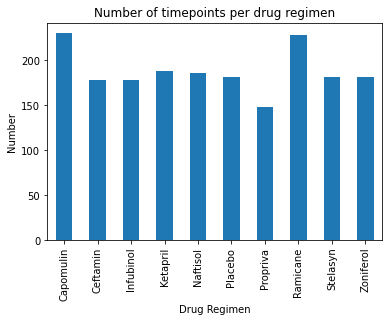

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
timepoint = regimen_summary_group["Tumor Volume (mm3)"].count()
timepoint.plot(kind = "bar", title="Number of timepoints per drug regimen", ylabel="Number")

Text(0.5, 1.0, 'Number of timepoints per drug regimen')

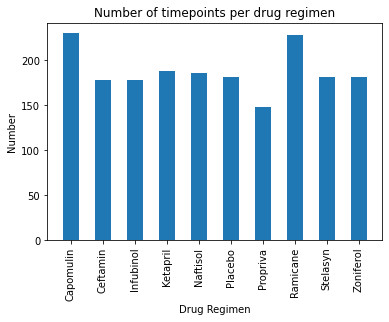

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
plt.bar(timepoint.index,timepoint, width = 0.5)
plt.xlabel("Drug Regimen")
plt.xticks(rotation="vertical")
plt.ylabel("Number")
plt.title("Number of timepoints per drug regimen")

<AxesSubplot:title={'center':'Sex of Mice'}>

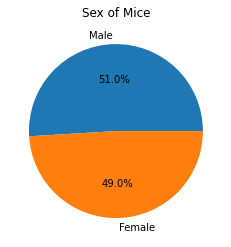

In [60]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mouse_sex=mouse_study_nodupes_df["Sex"].value_counts()
mouse_sex.plot(kind="pie", title="Sex of Mice", autopct="%1.1f%%", ylabel="")

Text(0.5, 1.0, 'Sex of Mice')

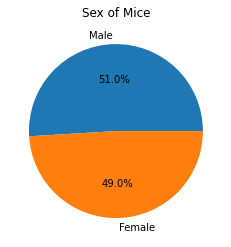

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(mouse_sex, labels=["Male", "Female"], autopct="%1.1f%%")
plt.title("Sex of Mice")

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens: 
# Capomulin, Ramicane, Infubinol, and Ceftamin

In [14]:
# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = mouse_study_nodupes_df.groupby(["Mouse ID"]).max()

In [63]:
#copies in case merge messes something up
copy_mouse_df= mouse_study_nodupes_df.copy()
copy_max_timepoint= max_timepoint.copy()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
last_timepoint_again = pd.merge(mouse_study_nodupes_df, max_timepoint, on="Mouse ID")
last_timepoint_again

,Mouse ID,Drug Regimen_x,Sex_x,Age_months_x,Weight (g)_x,Timepoint_x,Tumor Volume (mm3)_x,Metastatic Sites_x,Duplicate_x,Drug Regimen_y,Sex_y,Age_months_y,Weight (g)_y,Timepoint_y,Tumor Volume (mm3)_y,Metastatic Sites_y,Duplicate_y
0,k403,Ramicane,Male,21,16,0,45.000000,0,False,Ramicane,Male,21,16,45,45.000000,1,False
1,k403,Ramicane,Male,21,16,5,38.825898,0,False,Ramicane,Male,21,16,45,45.000000,1,False
2,k403,Ramicane,Male,21,16,10,35.014271,1,False,Ramicane,Male,21,16,45,45.000000,1,False
3,k403,Ramicane,Male,21,16,15,34.223992,1,False,Ramicane,Male,21,16,45,45.000000,1,False
4,k403,Ramicane,Male,21,16,20,32.997729,1,False,Ramicane,Male,21,16,45,45.000000,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1875,z969,Naftisol,Male,9,30,25,63.145652,2,False,Naftisol,Male,9,30,45,73.867845,4,False
1876,z969,Naftisol,Male,9,30,30,65.841013,3,False,Naftisol,Male,9,30,45,73.867845,4,False
1877,z969,Naftisol,Male,9,30,35,69.176246,4,False,Naftisol,Male,9,30,45,73.867845,4,False
1878,z969,Naftisol,Male,9,30,40,70.314904,4,False,Naftisol,Male,9,30,45,73.867845,4,False


In [104]:
# Put treatments into a list for for loop (and later for plot labels)
drug_regimen_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty lists to fill with tumor vol data for plotting
capo_tumor = []
rami_tumor = []
infu_tumor = []
ceft_tumor = []
unique_mouse_list = []

#loop through for tumor data at ending timepoint
#https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.itertuples.html
for row in last_timepoint_again.itertuples():
    if row[6] == row[14] and row[1] not in unique_mouse_list:
        if row[2] == drug_regimen_list[0]:
            capo_tumor.append(row[7])
            unique_mouse_list.append(row[1])
        elif row[2] == drug_regimen_list[1]:
            rami_tumor.append(row[7])
            unique_mouse_list.append(row[1])
        elif row[2] == drug_regimen_list[2]:
            infu_tumor.append(row[7])
            unique_mouse_list.append(row[1])
        elif row[2] == drug_regimen_list[3]:
            ceft_tumor.append(row[7])
            unique_mouse_list.append(row[1])
#100 mice

In [153]:
#turn lists into series for .quantile to work
ind = np.arange(0, 25, 1)

capo_series = pd.Series(capo_tumor, index=ind)
rami_series = pd.Series(rami_tumor, index=ind)
infu_series = pd.Series(infu_tumor, index=ind)
ceft_series = pd.Series(ceft_tumor, index=ind)

In [175]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Determine outliers using upper and lower bounds

#for Capomulin
quartiles_capo = capo_series.quantile([.25,.5,.75])
lowerq_capo = quartiles_capo[.25]
upperq_capo = quartiles_capo[.75]
iqr_capo = upperq_capo-lowerq_capo
lower_bound_capo = lowerq_capo - (1.5*iqr_capo)
upper_bound_capo = upperq_capo + (1.5*iqr_capo)

capo_outliers = []
for x in capo_series:
    if x < lower_bound_capo or x > upper_bound_capo:
        capo_outliers.append([x])
print(f"Values below {round(lower_bound_capo, 3)} and above {round(upper_bound_capo, 3)} could be outliers for the Capomulin drug regimen.")
print(f"There are {len(capo_outliers)} outliers in the dataset.")

Values below 20.705 and above 51.832 could be outliers for the Capomulin drug regimen.
There are 0 outliers in the dataset.


In [174]:
#for Ramicane
quartiles_rami = rami_series.quantile([.25,.5,.75])
lowerq_rami = quartiles_rami[0.25]
upperq_rami = quartiles_rami[.75]
iqr_rami = upperq_rami-lowerq_rami
lower_bound_rami = lowerq_rami - (1.5*iqr_rami)
upper_bound_rami = upperq_rami + (1.5*iqr_rami)


rami_outliers = []
for x in rami_series:
    if x < lower_bound_rami or x > upper_bound_rami:
        rami_outliers.append([x])

print(f"Values below {round(lower_bound_rami, 3)} and above {round(upper_bound_rami, 3)} could be outliers for the Ramicane drug regimen.")
print(f"There are {len(rami_outliers)} outliers in the dataset.")

Values below 17.913 and above 54.307 could be outliers for the Ramicane drug regimen.
There are 0 outliers in the dataset.


In [206]:
print(quartiles_rami[0.5], quartiles_capo[0.5])

36.56165229 38.1251644


In [176]:
#for Infubinol
quartiles_infu = infu_series.quantile([.25,.5,.75])
lowerq_infu = quartiles_infu[0.25]
upperq_infu = quartiles_infu[.75]
iqr_infu = upperq_infu-lowerq_infu
lower_bound_infu = lowerq_infu - (1.5*iqr_infu)
upper_bound_infu = upperq_infu + (1.5*iqr_infu)

infu_outliers = []
for x in infu_series:
    if x < lower_bound_infu or x > upper_bound_infu:
        infu_outliers.append([x])

print(f"Values below {round(lower_bound_infu, 3)} and above {round(upper_bound_infu, 3)} could be outliers for the Infubinol drug regimen.")
print(f"There is {len(infu_outliers)} outlier in the dataset. It is: {infu_outliers}.")

Values below 36.833 and above 82.741 could be outliers for the Infubinol drug regimen.
There is 1 outlier in the dataset. It is: [[36.3213458]].


In [178]:
#for Ceftamin
quartiles_ceft = ceft_series.quantile([.25,.5,.75])
lowerq_ceft = quartiles_ceft[0.25]
upperq_ceft = quartiles_ceft[.75]
iqr_ceft = upperq_ceft-lowerq_ceft
lower_bound_ceft = lowerq_ceft - (1.5*iqr_ceft)
upper_bound_ceft = upperq_ceft + (1.5*iqr_ceft)

ceft_outliers = []
for x in ceft_series:
    if x < lower_bound_ceft or x > upper_bound_ceft:
        ceft_outliers.append([x])

print(f"Values below {round(lower_bound_ceft, 3)} and above {round(upper_bound_ceft, 3)} could be outliers for the Ceftamin drug regimen.")
print(f"There are {len(ceft_outliers)} outliers in the dataset.")

Values below 25.355 and above 87.666 could be outliers for the Ceftamin drug regimen.
There are 0 outliers in the dataset.


In [207]:
print(quartiles_infu[0.5], quartiles_ceft[0.5])

60.16518046 59.85195552


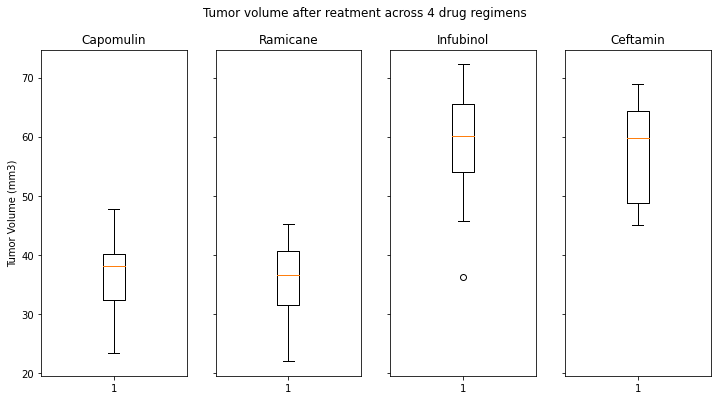

In [189]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharey=True, figsize=(12, 6))

ax1.set_ylabel('Tumor Volume (mm3)')  

ax1.set_title('Capomulin')
ax1.boxplot(capo_series)

ax2.set_title('Ramicane')
ax2.boxplot(rami_series)

ax3.set_title('Infubinol')
ax3.boxplot(infu_series)

ax4.set_title('Ceftamin')
ax4.boxplot(ceft_series)


plt.suptitle("Tumor volume after reatment across 4 drug regimens")
plt.show()

In [221]:
#outlier from Infubinol dataset
infu_outlier_mouse = last_timepoint_again.loc[last_timepoint_again["Tumor Volume (mm3)_x"] == 36.3213458, :]
infu_outlier_mouse 

,Mouse ID,Drug Regimen_x,Sex_x,Age_months_x,Weight (g)_x,Timepoint_x,Tumor Volume (mm3)_x,Metastatic Sites_x,Duplicate_x,Drug Regimen_y,Sex_y,Age_months_y,Weight (g)_y,Timepoint_y,Tumor Volume (mm3)_y,Metastatic Sites_y,Duplicate_y
669,c326,Infubinol,Female,18,25,5,36.321346,0,False,Infubinol,Female,18,25,5,45.0,0,False


In [210]:
mouse_study_nodupes_df.loc[mouse_study_nodupes_df["Mouse ID"] == "c326", :]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Duplicate
668,c326,Infubinol,Female,18,25,0,45.000000,0,False
669,c326,Infubinol,Female,18,25,5,36.321346,0,False


## Line and Scatter Plots

In [19]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with CapomulinS

In [ ]:
#save one Mouse ID for a capomulin-treated mouse
mouse_id_by_drug=regimen_summary_group["Mouse ID"].unique()
capo_mouse = mouse_id_by_drug["Capomulin"][0]

In [20]:
#select data for one capo mouse from larger frame
capo_mouse_data = mouse_study_nodupes_df.loc[mouse_study_nodupes_df["Mouse ID"] == capo_mouse, ["Timepoint","Tumor Volume (mm3)"]]

#save columns as variables for plotting
x_data = capo_mouse_data["Timepoint"]
y_data = capo_mouse_data["Tumor Volume (mm3)"]

(0.0, 47.0)

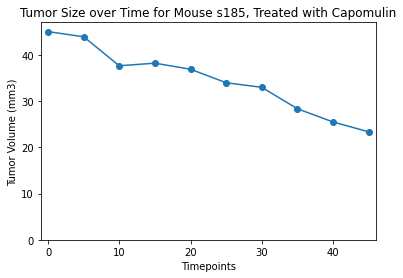

In [33]:
#plot single mouse data
plt.plot(x_data, y_data, marker="o")
plt.title(f"Tumor Size over Time for Mouse {capo_mouse}, Treated with Capomulin")
plt.xlabel("Timepoints")
plt.ylabel("Tumor Volume (mm3)")
plt.xlim(-1, max(x_data) + 1)
plt.ylim(0, max(y_data) + 2)

In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

(12.0, 27.0)

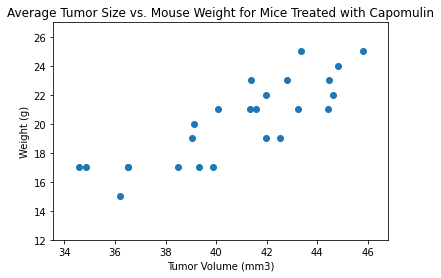

In [52]:
#get all mouse data for Capomulin
all_capo_mice = mouse_study_nodupes_df.loc[mouse_study_nodupes_df["Drug Regimen"] == "Capomulin", :]

#group by mouse ID, avergae Tumor Vol per mouse and copy weight
capo_weight_vol = all_capo_mice.groupby(["Mouse ID"]).agg({"Tumor Volume (mm3)": "mean", "Weight (g)": "first"})

#save columns for plotting
x_axis_data = capo_weight_vol["Tumor Volume (mm3)"]
y_axis_data = capo_weight_vol["Weight (g)"]

#plot data
plt.scatter(x_axis_data, y_axis_data)
plt.title(f"Average Tumor Size vs. Mouse Weight for Mice Treated with Capomulin")
plt.xlabel("Tumor Volume (mm3)")
plt.ylabel("Weight (g)")
plt.xlim(min(x_axis_data) - 1, max(x_axis_data) + 1)
plt.ylim(12, max(y_axis_data) + 2)

## Correlation and Regression

In [55]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis_data, y_axis_data)
regress_values = x_axis_data * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"The r-squared is: {rvalue**2}")
print(f"The equation for the line of best fit is {line_eq}")

The r-squared is: 0.7088568047708723
The equation for the line of best fit is y = 0.74x + -10.15


Text(38, 14, 'y = 0.74x + -10.15')

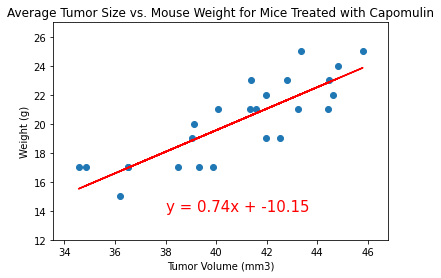

In [58]:
#plot grpah again, with line of best fit
plt.scatter(x_axis_data, y_axis_data)
plt.title(f"Average Tumor Size vs. Mouse Weight for Mice Treated with Capomulin")
plt.xlabel("Tumor Volume (mm3)")
plt.ylabel("Weight (g)")
plt.xlim(min(x_axis_data) - 1, max(x_axis_data) + 1)
plt.ylim(12, max(y_axis_data) + 2)

plt.plot(x_axis_data,regress_values,"r-")
plt.annotate(line_eq,(38,14),fontsize=15,color="red")